<a href="https://colab.research.google.com/github/Preetirekha-Das/Machine-Learning-Course/blob/main/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle.json
house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
Dataset loaded ✅
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1

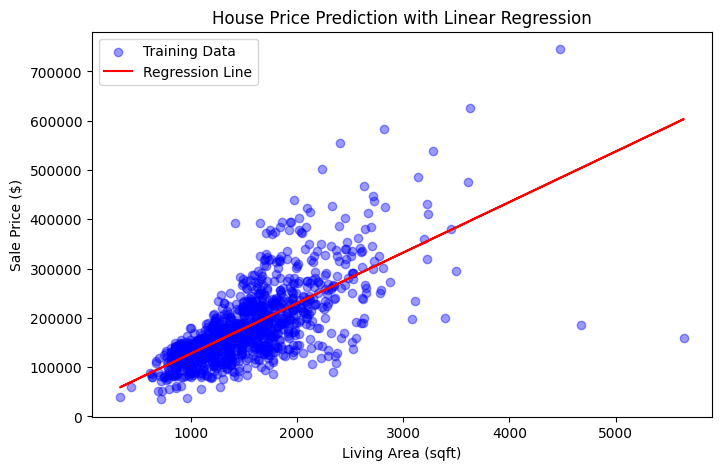

In [10]:
# ============================
# STEP 1: Upload kaggle.json
# ============================
from google.colab import files
files.upload()   # 👈 Choose kaggle.json here

# ============================
# STEP 2: Move kaggle.json to correct location
# ============================
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# ============================
# STEP 3: Download dataset (make sure you clicked "Join Competition" on Kaggle)
# ============================
!kaggle competitions download -c house-prices-advanced-regression-techniques

# ============================
# STEP 4: Unzip dataset
# ============================
!unzip -o house-prices-advanced-regression-techniques.zip

# ============================
# STEP 5: Load dataset
# ============================
import pandas as pd

data = pd.read_csv("train.csv")
print("Dataset loaded ✅")
print(data.head())

# ============================
# ============================
# STEP 6 (extended): Train/Test Split + Linear Regression
# ============================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Feature (house size in square feet)
X = data[['GrLivArea']]
y = data['SalePrice']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("✅ Model Evaluation")
print("R² (Train):", r2_train)
print("R² (Test):", r2_test)
print("RMSE (Train):", rmse_train)
print("RMSE (Test):", rmse_test)

# ============================
# STEP 7: Visualize Regression Line (on training data)
# ============================
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color="blue", alpha=0.4, label="Training Data")
plt.plot(X_train, y_train_pred, color="red", label="Regression Line")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price ($)")
plt.title("House Price Prediction with Linear Regression")
plt.legend()
plt.show()


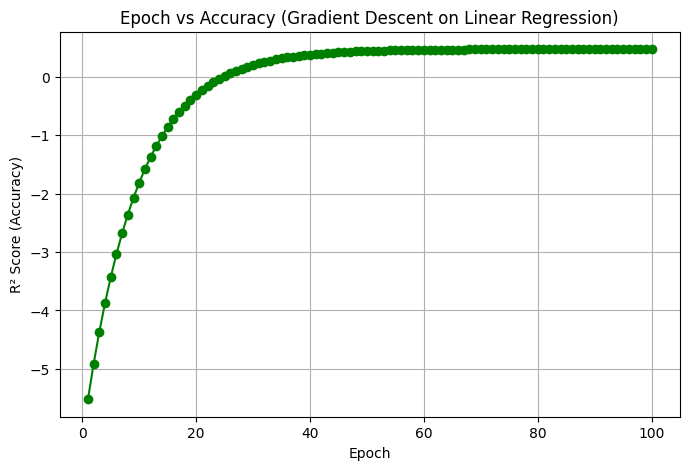

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Reuse X_train, X_test, y_train, y_test
X_train_np = X_train.values
y_train_np = y_train.values

# Initialize weights
m = 0.0   # slope
c = 0.0   # intercept
lr = 0.00000001  # learning rate (tuned for scale of prices)
epochs = 100

accuracy_per_epoch = []

# Training with gradient descent
for epoch in range(epochs):
    y_pred = m * X_train_np + c
    error = y_pred.flatten() - y_train_np

    # Gradients
    dm = (2/len(X_train_np)) * np.sum(error * X_train_np.flatten())
    dc = (2/len(X_train_np)) * np.sum(error)

    # Update weights
    m -= lr * dm
    c -= lr * dc

    # Calculate R² score as "accuracy"
    acc = r2_score(y_train_np, y_pred)
    accuracy_per_epoch.append(acc)

# Plot Epoch vs Accuracy
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), accuracy_per_epoch, marker='o', color='green')
plt.xlabel("Epoch")
plt.ylabel("R² Score (Accuracy)")
plt.title("Epoch vs Accuracy (Gradient Descent on Linear Regression)")
plt.grid(True)
plt.show()

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"preetirekhadas","key":"687f14b38d0876340eb6625ca4b6f94e"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 723MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
